In [1]:
import os

current_dir = os.getcwd()

print("Current directory:", current_dir)


Current directory: /Users/davidfernandez/Desktop


In [112]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,8)

import warnings
warnings.filterwarnings('ignore')

import pandas as pd

from sklearn.preprocessing import LabelEncoder  



In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import train_test_split



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

In [114]:
df = pd.read_csv('/Users/davidfernandez/Desktop/diamonds/train.csv')


In [115]:
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.42,Premium,D,SI2,62.1,59.0,4.78,4.82,2.98,6.551
40451,40451,0.53,Premium,G,VS2,62.0,58.0,5.21,5.18,3.22,7.382
40452,40452,0.80,Good,G,SI2,62.8,58.0,5.86,5.90,3.69,7.768
40453,40453,1.01,Very Good,F,VS2,61.5,57.0,6.40,6.48,3.96,8.726


## EDA

In [116]:
df.info() # First, we want to explore our data, and see which categories we have

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


In [117]:
df.describe() # And now we want to see some descriptive statistics

,id,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,20227.000000,0.797576,61.746377,57.451694,5.729163,5.732896,3.537351,7.783822
std,11678.496907,0.475939,1.436796,2.234569,1.125244,1.154799,0.711002,1.016828
min,0.000000,0.200000,43.000000,44.000000,0.000000,0.000000,0.000000,5.787000
25%,10113.500000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,6.851000
50%,20227.000000,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,7.780000
75%,30340.500000,1.040000,62.500000,59.000000,6.540000,6.540000,4.030000,8.581000
max,40454.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,9.842000


## Response variable

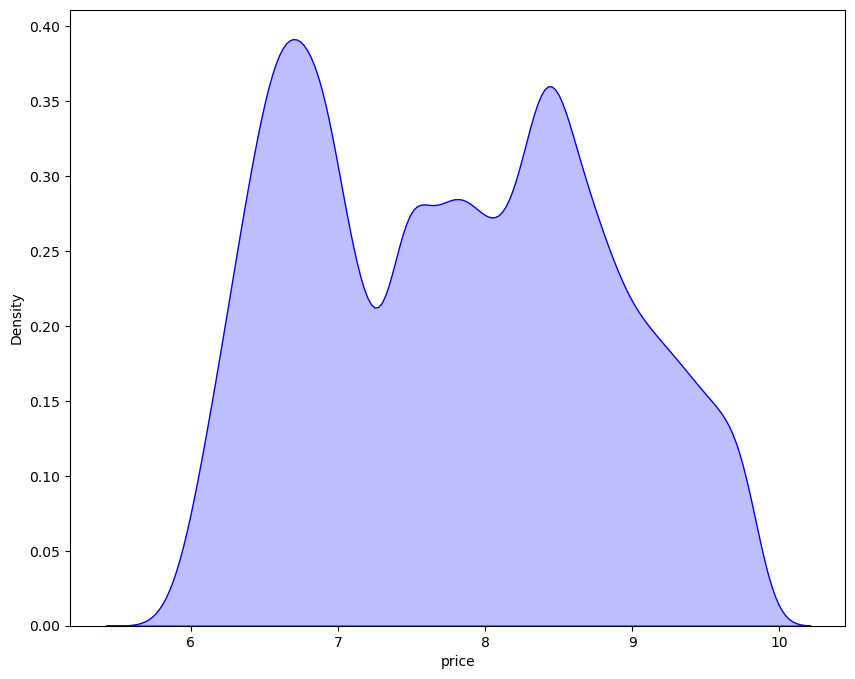

In [118]:
sns.distplot(
    df.price, 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});


## Predictor variables

### Numeric variables

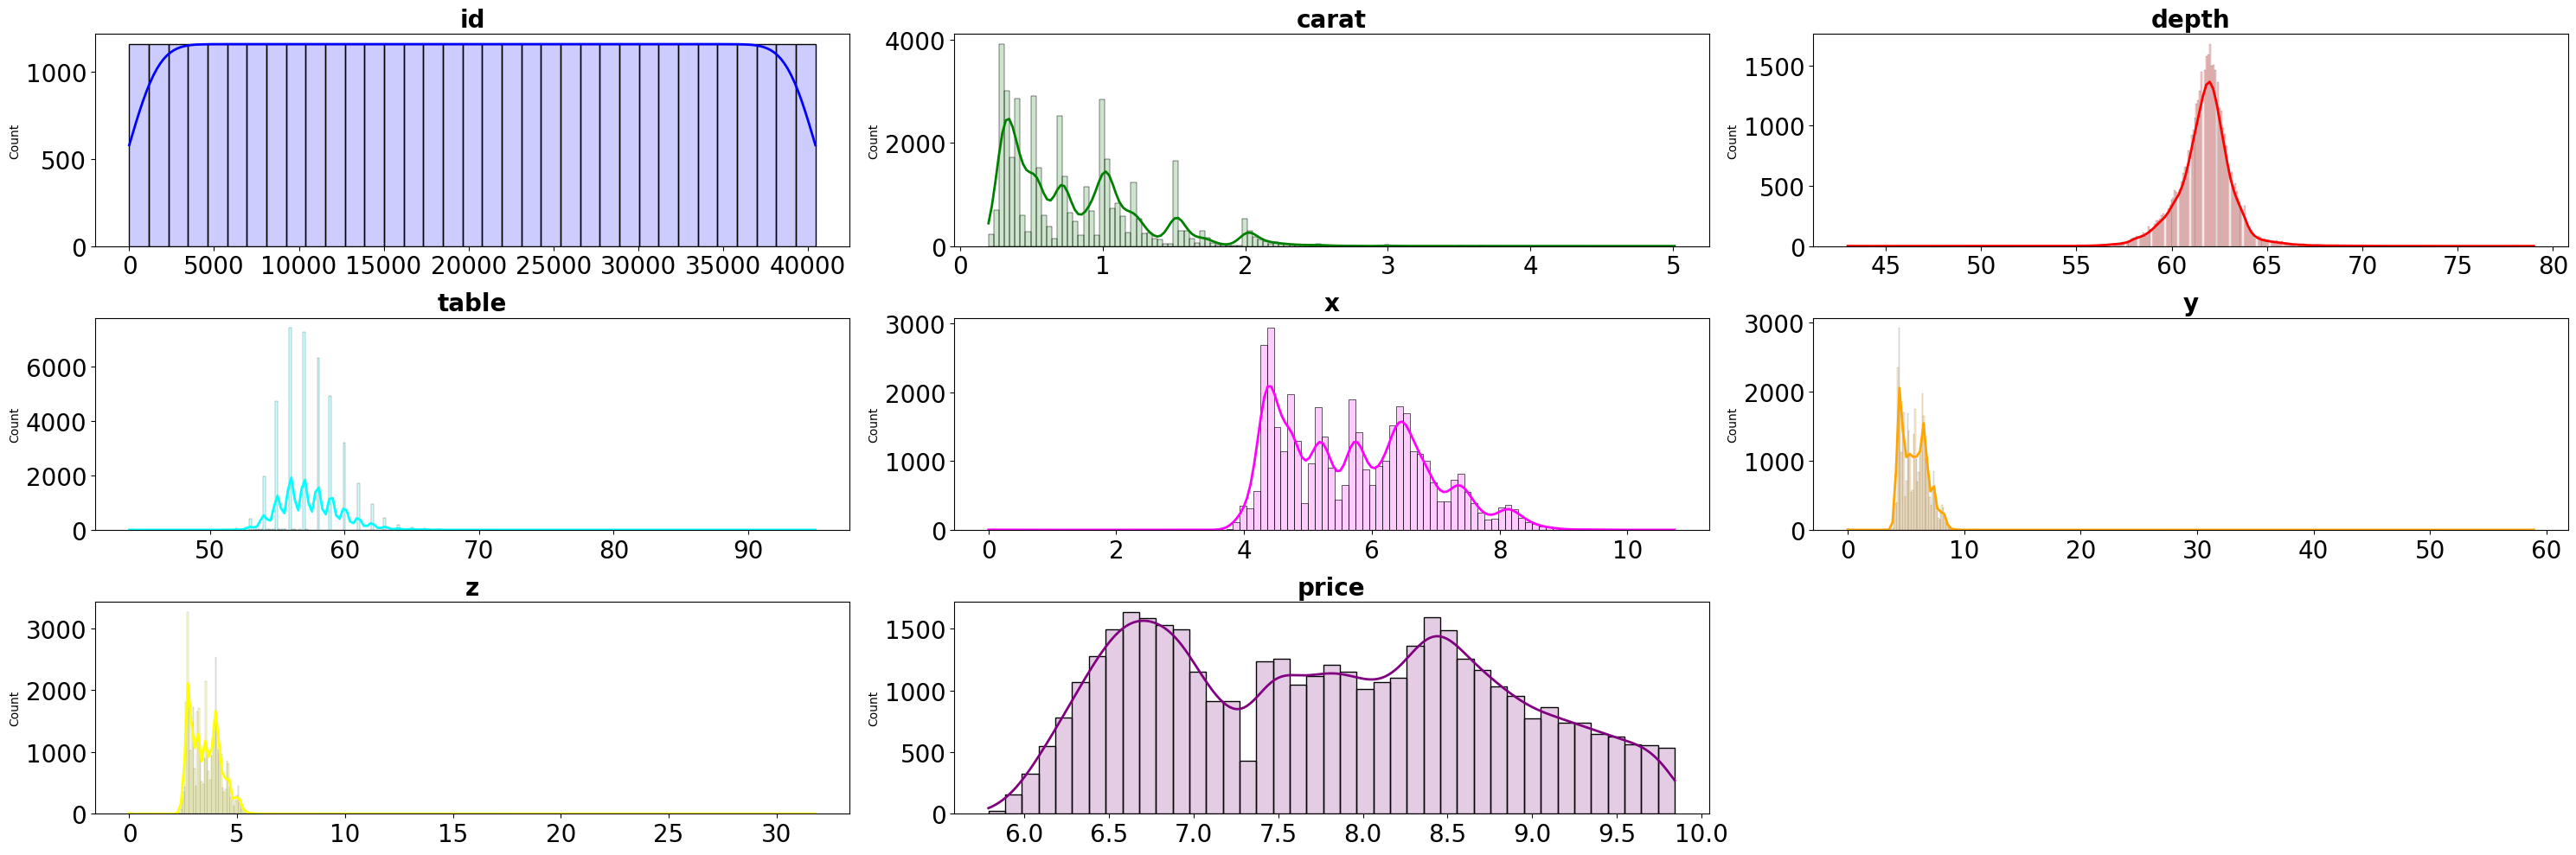

In [119]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange", "yellow", 'purple']

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 20, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout()
fig.delaxes(axes[-1])

# We observe how the numerical variables are distributed

In [120]:
from scipy import stats



stats.shapiro(df["price"])

ShapiroResult(statistic=0.9629325270652771, pvalue=0.0)

In [121]:
stats.shapiro(df["carat"])

ShapiroResult(statistic=0.892208456993103, pvalue=0.0)

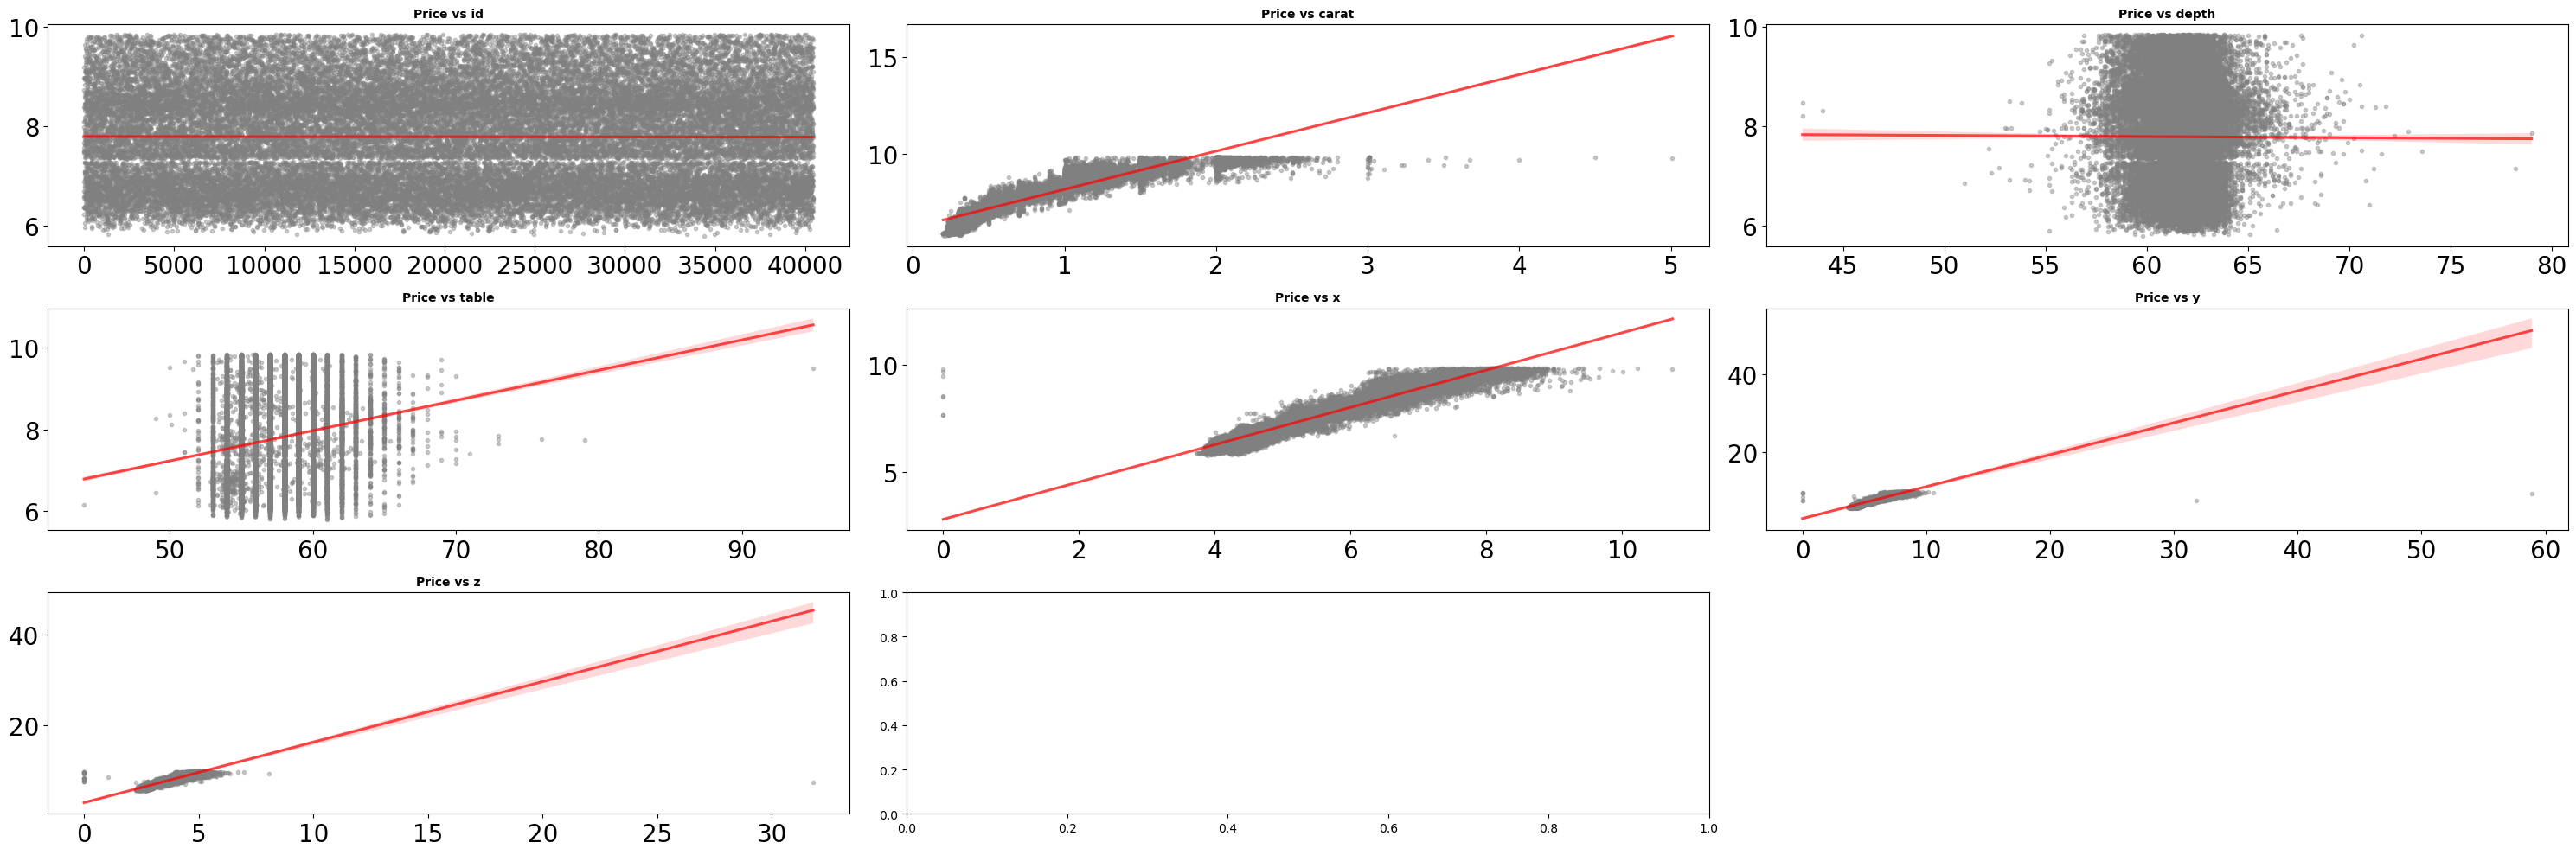

In [122]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange", "yellow"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("price")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["price"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Price vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
fig.delaxes(axes[-1]) 

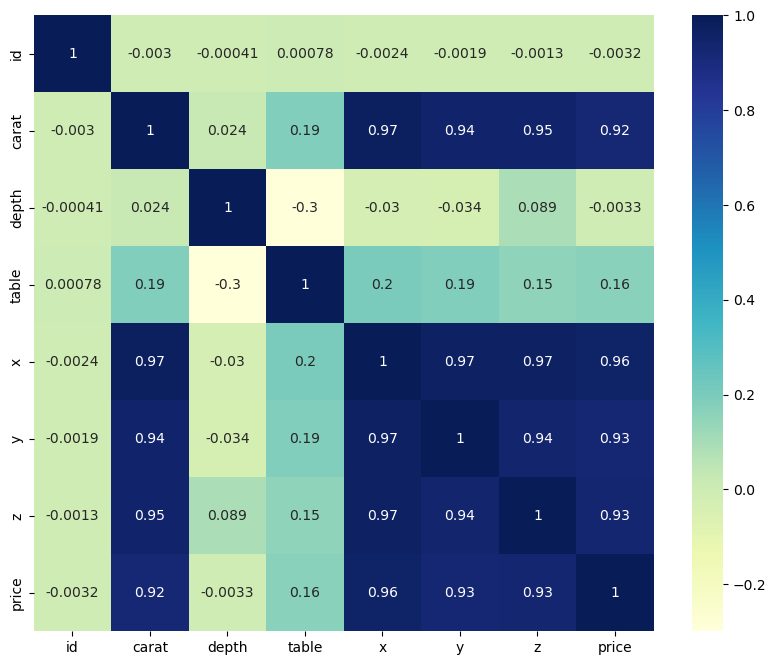

In [123]:
sns.heatmap(df.corr(numeric_only = True), 
           cmap = "YlGnBu", 
           annot = True);

# We observe the correlation among our numeric predictive variables

### Categorical variables

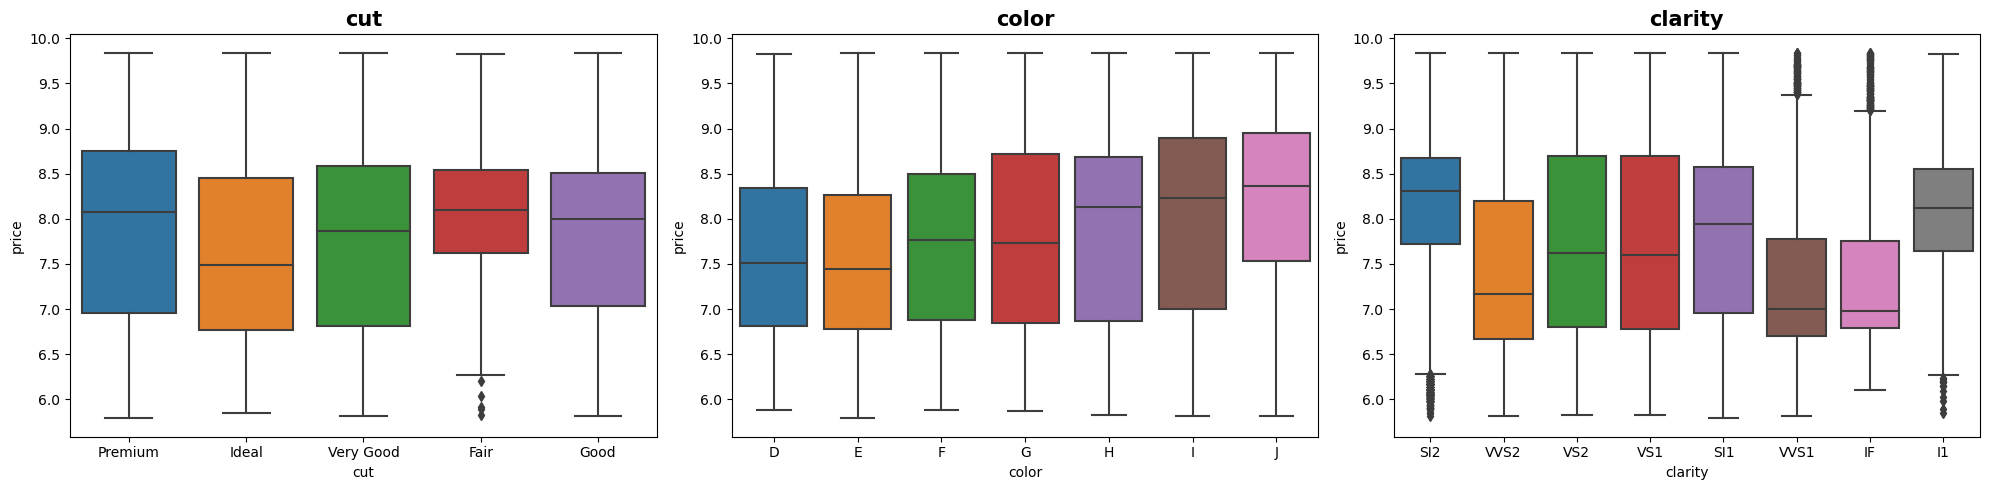

In [124]:
fig, axes = plt.subplots(1, 3, figsize = (20,5))


columnas_object = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_object):
    sns.boxplot(x=colum, y="price", data=df,ax=axes[i])
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    
fig.tight_layout();

## Preprocessing

### Null values management

In [125]:
df.isnull().sum() 

''' Our dataframe doesn't contain any null values, so we don't need to manage them. 
Nonetheless, we have some zeros in our df that we need to get rid of'''


" Our dataframe doesn't contain any null values, so we don't need to manage them. \nNonetheless, we have some zeros in our df that we need to get rid of"

In [126]:
df['x'] = df['x'].replace(0, np.nan)
df['y'] = df['y'].replace(0, np.nan)
df['z'] = df['z'].replace(0, np.nan)


# We drop the columns that have null values in our columns 'x', 'y' and 'z' 
df = df.dropna(subset=['x', 'y', 'z'])

In [127]:
df.describe()

,id,carat,depth,table,x,y,z,price
count,40438.000000,40438.000000,40438.000000,40438.000000,40438.000000,40438.000000,40438.000000,40438.000000
mean,20229.268831,0.797276,61.746288,57.451464,5.729696,5.733281,3.538838,7.783371
std,11678.446854,0.475643,1.436631,2.234446,1.122480,1.152485,0.707442,1.016666
min,0.000000,0.200000,43.000000,44.000000,3.730000,3.680000,1.070000,5.787000
25%,10116.250000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,6.851000
50%,20230.500000,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,7.779000
75%,30342.750000,1.040000,62.500000,59.000000,6.540000,6.540000,4.030000,8.580000
max,40454.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,9.842000


## Outliers values management

In [128]:
df_numericas = df.select_dtypes(include=np.number)

df_numericas 

# We first select only our numeric values

,id,carat,depth,table,x,y,z,price
0,0,0.30,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,62.3,59.0,4.50,4.55,2.82,6.588
...,...,...,...,...,...,...,...,...
40450,40450,0.42,62.1,59.0,4.78,4.82,2.98,6.551
40451,40451,0.53,62.0,58.0,5.21,5.18,3.22,7.382
40452,40452,0.80,62.8,58.0,5.86,5.90,3.69,7.768
40453,40453,1.01,61.5,57.0,6.40,6.48,3.96,8.726


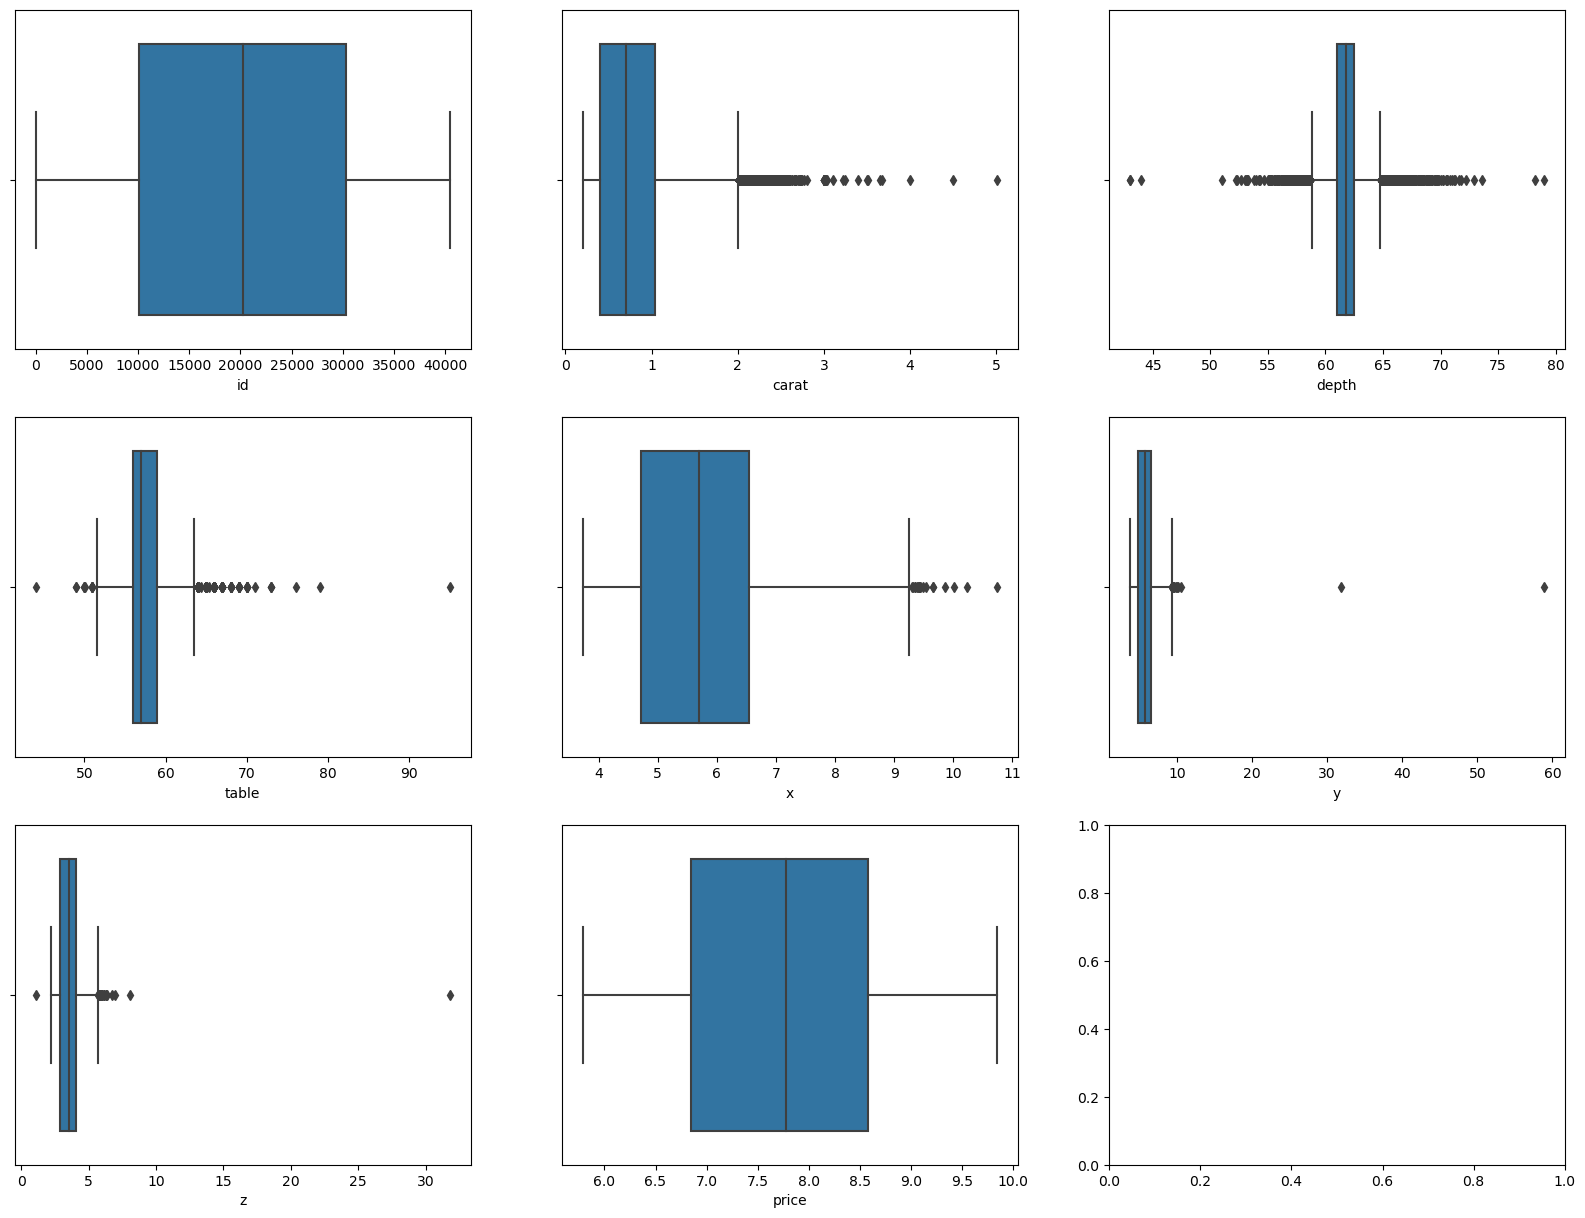

In [129]:
fig, axes = plt.subplots(3, 3, figsize=(20,15))
axes = axes.flat

for indice, columna in enumerate(df_numericas.columns):
    sns.boxplot(x=columna, data=df_numericas, ax=axes[indice])
plt.show()

# And now we visualize the outliers in our data

### First combination

In [130]:
df1 = df.copy() # In our first combination, we're not going to touch our outliers

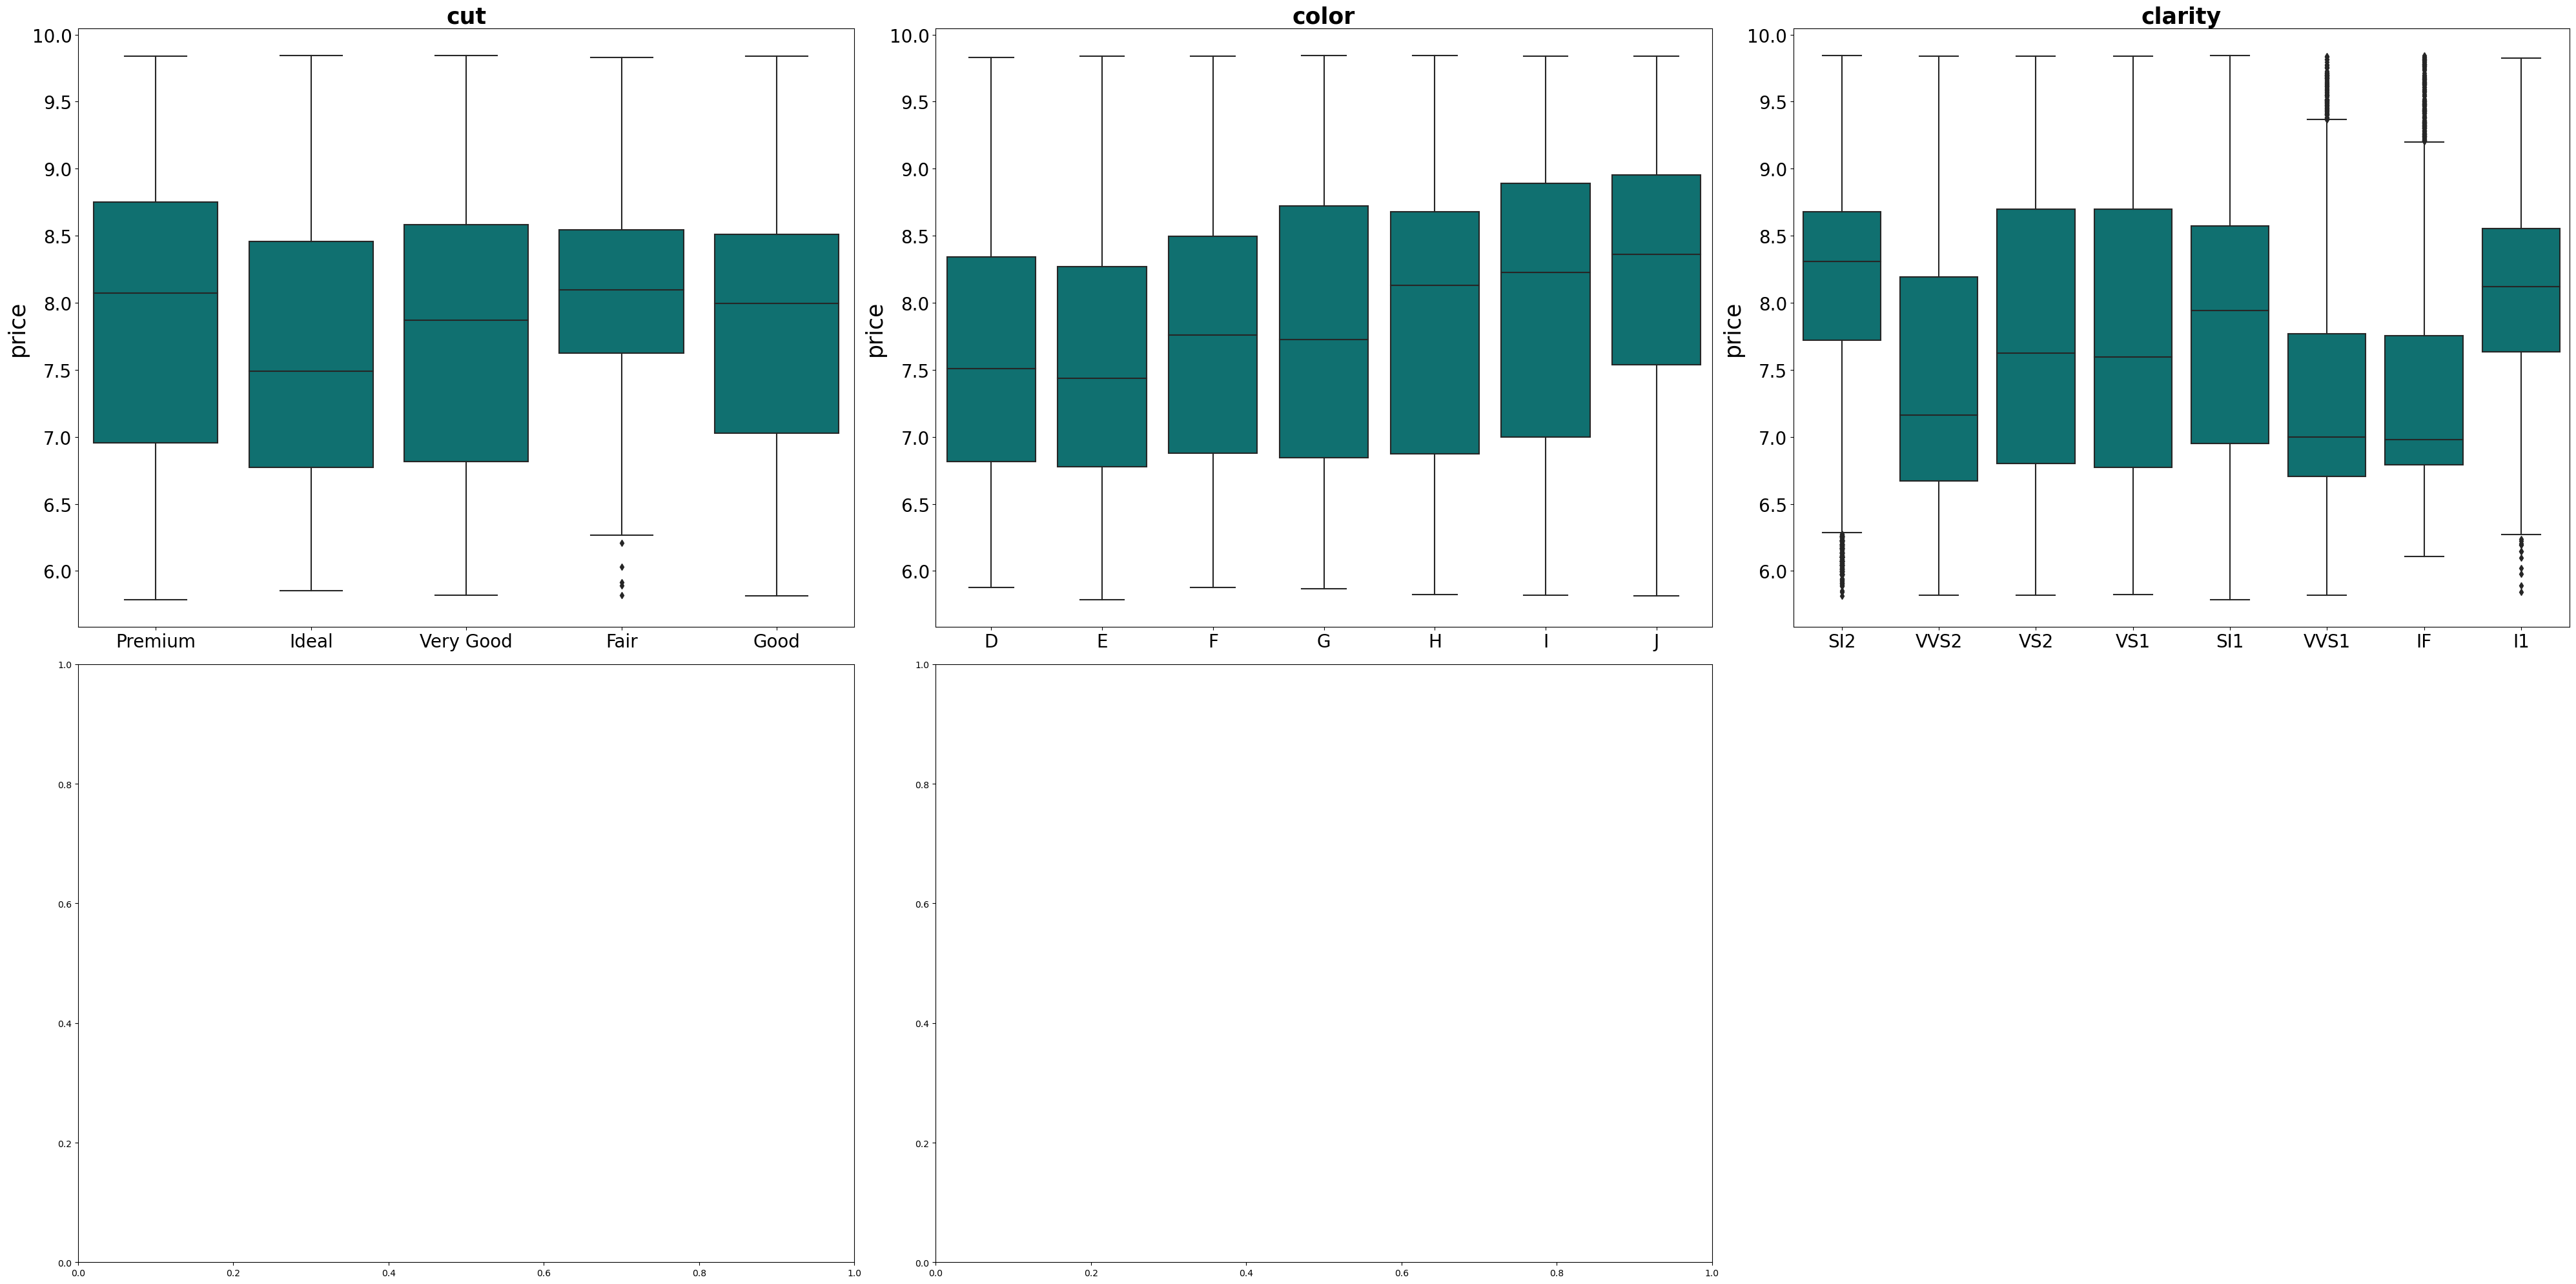

In [131]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (40, 20))


axes = axes.flat

columnas_cat = df.select_dtypes(include = ["object", "category"]).columns

for i, colum in enumerate(columnas_cat): 
    sns.boxplot(
        data = df,
        x = colum,
        y = "price",
        color = "teal", 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel( "price", fontsize = 25)

fig.delaxes(axes[-1])

fig.tight_layout();

In [132]:
df1

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.42,Premium,D,SI2,62.1,59.0,4.78,4.82,2.98,6.551
40451,40451,0.53,Premium,G,VS2,62.0,58.0,5.21,5.18,3.22,7.382
40452,40452,0.80,Good,G,SI2,62.8,58.0,5.86,5.90,3.69,7.768
40453,40453,1.01,Very Good,F,VS2,61.5,57.0,6.40,6.48,3.96,8.726


## Encoding

In [133]:
from sklearn.preprocessing import OrdinalEncoder  


In [134]:
orden = ['Fair', 'Premium', 'Good', 'Very Good', 'Ideal']
orden1 = ['J', 'I', 'H', 'G', 'F', 'D', 'E'] 
orden2 = ['SI2', 'I1', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']  

#### 'Carat' column

In [135]:
ordinal = OrdinalEncoder(categories=[orden], dtype=int)
df1['cut_encoded'] = ordinal.fit_transform(df1[['cut']])


#### 'Color' column

In [136]:
ordinal = OrdinalEncoder(categories = [orden1], dtype = int)
df1['color_encoded'] = ordinal.fit_transform(df1[['color']])


#### 'Clarity' column

In [137]:
ordinal = OrdinalEncoder(categories = [orden2], dtype = int)
df1['clarity_encoded'] = ordinal.fit_transform(df1[['clarity']])

In [138]:
df1.to_csv('preprocessed.csv', index=False)
